### In the third lesson we will implement the Cherenkov photons produced by the charged particles crossing the water tank 
To start, we need to compute the Cherenkov threshold for the particle.        

In [76]:
# First of all execute python script to load the defined functions 

%run functions.py 

In [77]:
import numpy as np  
from astropy import units as u
import matplotlib.pyplot as plt

# Define muon energy 

ek = 1000 * u.MeV
beta = _beta(ek,m0)

In [78]:
# 
n = 1.333

def check_Ch_th(beta,n): 
    return beta > 1 / n 

In [79]:
# Compute Cherenkov threshold in kinetic energy for a muon in water 
b_th = 1. / n
gamma_th = 1 / np.sqrt( 1 - b_th*b_th)
e_th = (gamma_th -1)* m0
print('Cherenkov kinetic energy threshold for muon in water is: ',e_th)  

Cherenkov kinetic energy threshold for muon in water is:  54.13346203981083 MeV


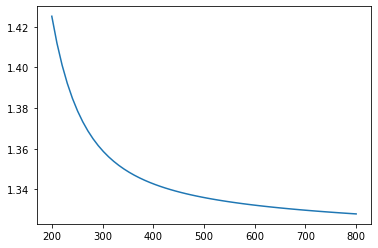

In [80]:
# Define function for refractive index of water as a function of wavelength   
def n_water(l): 
       return 1.31279 + 15.762 * u.nm / l + (-4382 * u.nm * u.nm) * np.power(l,-2) + (1.1455e6 * u.nm**3)  * np.power(l,-3)
   
# Compute it for wavelengths from 200 to 800 nm 
lambda_points = np.linspace(200,800,60) * u.nm 
plt.plot(lambda_points, n_water(lambda_points))       

In [81]:
# Now define formula for Cherenkov emission 

def cherenkov_photons_disp(beta,lam1,lam2): 
    return 2.*np.pi * alpha * (1. / lam1 - 1. / lam2) * ( 1. - 1. / (beta**2 * n_water((lam1 + lam2)/2.)**2 )) 


def cherenkov_photons(beta,lam1,lam2): 
    return 2.*np.pi * alpha * (1. / lam1 - 1. / lam2) * ( 1. - 1. / (beta**2 * n**2 )) 

In [82]:
lambda_low = lambda_points[:-1] 
lambda_hi = lambda_points[1:] 
lambda_centers = (lambda_low + lambda_hi) / 2

dx = 1 * u.cm

nph = cherenkov_photons_disp(beta,lambda_low,lambda_hi) * dx.to(u.nm) 
nph2 = cherenkov_photons(beta,lambda_low,lambda_hi) * dx.to(u.nm) 

In [83]:
print(nph)

[55.27223983 49.30680821 44.29527115 40.04093253 36.39527968 33.24466503
 30.50100506 28.09520401 25.97244606 24.08878351 22.40863441 20.90292589
 19.54770109 18.32306279 17.2123641  16.20158253 15.27883132 14.4339747
 13.65832241 12.94438532 12.28567847 11.6765612  11.11210662 10.58799426
 10.10042134  9.64602908  9.221841    8.82521123  8.45378081  8.10544069
  7.77830029  7.47066053  7.18099084  6.9079092   6.65016508  6.40662453
  6.17625726  5.95812539  5.7513736   5.55522047  5.36895092  5.1919095
  5.02349451  4.8631527   4.71037471  4.5646909   4.42566764  4.29290409
  4.1660292   4.04469914  3.92859485  3.81741999  3.71089897  3.60877528
  3.51080984  3.41677967  3.32647656  3.23970593  3.15628573]


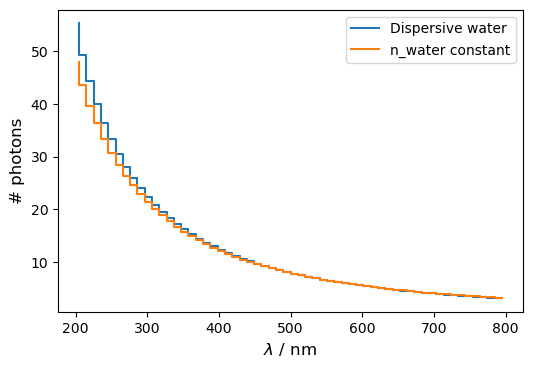

In [84]:
plt.figure(dpi=100)
plt.step(lambda_centers, nph, label='Dispersive water' )
plt.step(lambda_centers, nph2, label='n_water constant' )
plt.xlabel(r'$\lambda$ / nm',size=12)
plt.ylabel('# photons',size=12)
plt.legend()

In [128]:
n_lam_bins = 61 

def cherenkov_photons_array(beta,dx):
    lambda_points = np.linspace(200,800,n_lam_bins) * u.nm 
    lambda_low = lambda_points[:-1] 
    lambda_hi = lambda_points[1:] 
    lambda_centers = (lambda_low + lambda_hi) / 2

    return [lambda_low,lambda_hi], 2.*np.pi * alpha * (1. / lambda_low - 1. / lambda_hi) * ( 1. - 1. / (beta**2 * n**2 )) * dx.to(u.nm)



In [263]:
print(np.linspace(200,800,n_lam_bins) )

[200. 210. 220. 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330.
 340. 350. 360. 370. 380. 390. 400. 410. 420. 430. 440. 450. 460. 470.
 480. 490. 500. 510. 520. 530. 540. 550. 560. 570. 580. 590. 600. 610.
 620. 630. 640. 650. 660. 670. 680. 690. 700. 710. 720. 730. 740. 750.
 760. 770. 780. 790. 800.]


In [250]:
# Now let's go back to the 1 GeV muon, compute the Cherenkov photons produced along it's track 

ek_mu = 1 * u.GeV 
beta_mu = _beta(ek_mu,m0)
gamma_mu = _gamma(ek_mu,m0)   
Wmax_mu = _Wmax(ek_mu,m0)

# Retrieve water properties 

Z_A=0.55509 *u.mol / u.g #mol g^-1, atomic number Z over atomic mass mol g^-1 
rho=1 * u.g / u.cm**3 #g cm^-3, density of liquid water 
I=7.97e-5 * u.MeV #MeV, mean excitation energy

K=0.307075 * u.MeV * u.cm **2 / u.mol #MeV mol^−1 cm2
 

In [253]:
h = 120 * u.cm  # Height of the tank 
dx = 1 * u.cm 
nsteps = int(h/dx)
d = 0. * u.cm

d_array = np.zeros(nsteps) * u.cm
ch_photons = np.zeros(nsteps, dtype=object)
tot_ch_photons = np.zeros(nsteps)
z_photons = np.zeros((nsteps,n_lam_bins), dtype=object) 
z_photons_list = []
z_photons_list_lambda = []
z_photons_list_lambda_2_3 = []
z_photons_list_lambda_3_4 = []
z_photons_list_lambda_4_5 = []
z_photons_list_lambda_5_6 = []
z_photons_list_lambda_6_7 = []
z_photons_list_lambda_7_8 = []
z_photon_list_array = [z_photons_list_lambda_2_3, z_photons_list_lambda_3_4, z_photons_list_lambda_4_5, z_photons_list_lambda_5_6, z_photons_list_lambda_6_7, z_photons_list_lambda_7_8]
lambda_edges = [200, 300, 400, 500, 600, 700, 800] * u.nm

for i_step in range(nsteps): 
    
    eloss = de_dx_muon(beta_mu,gamma_mu,Wmax_mu,K, Z_A, I, rho ) * dx/2
    ek_mu = ek_mu - eloss 
    beta_mu = _beta(ek_mu,m0)    
    gamma_mu = _gamma(ek_mu,m0)    
    Wmax_mu = _Wmax(ek_mu,m0)    
    
    lam_array, n_ch_mean = cherenkov_photons_array(beta_mu,dx) 
    n_ch = np.random.poisson(n_ch_mean)

    for i_lam in range(len(n_ch)): 
        z_ch = np.random.uniform(d.value,(d+dx).value,size=n_ch[i_lam]) 
        z_photons[i_step][i_lam] = z_ch
        z_photons_list.extend(z_ch)
        for i_edge in range(len(lambda_edges)-1):
            if(lam_array[0][i_lam] < lambda_edges[i_edge+1] and lam_array[0][i_lam] >= lambda_edges[i_edge]):z_photon_list_array[i_edge].extend(z_ch)
        
    eloss = de_dx_muon(beta_mu,gamma_mu,Wmax_mu,K, Z_A, I, rho ) * dx/2
    ek_mu = ek_mu - eloss 
    beta_mu = _beta(ek_mu,m0)   
    gamma_mu = _gamma(ek_mu,m0)    
    Wmax_mu = _Wmax(ek_mu,m0)    

    d += dx

    d_array[i_step] = d
    ch_photons[i_step] = n_ch 
    tot_ch_photons[i_step] = np.sum(n_ch)
    
    if(beta_mu < 1/n):break  


Text(0, 0.5, '# Cherenkov photons')

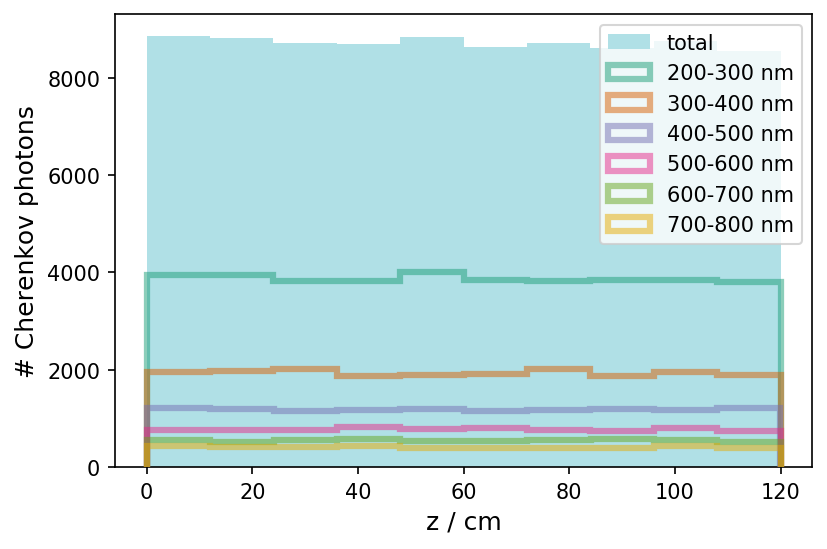

In [261]:
plt.figure(dpi=150)
cols = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

plt.hist(z_photons_list, label='total', color='powderblue')

for i in range(len(z_photon_list_array)):
    label_string = ('%d-%d nm'%(lambda_edges[i].value,lambda_edges[i+1].value) )
    plt.hist(z_photon_list_array[i],alpha=0.5,label=label_string, color=cols[i+1], linewidth=3, edgecolor=cols[i], fill=False, histtype='step',zorder=3 )
    
plt.legend()
plt.xlabel('z / cm',size=12)
plt.ylabel('# Cherenkov photons',size=12)